# My direct mia

In [ ]:
# google colab pleaaase gimme more memory

#a = []
#while(1):
#    a.append('1')

## Imports, Download Models and Mounting Google Drive

In [1]:
# automatically reload my imports (%aimport) every time they are used
# cool feature for development
%load_ext autoreload
%autoreload 1

import os
import sys
# check if Notebook is loaded in google colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Install TensorFlow on Google Colab
  try:
    #%tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
  except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras.models import Model

In [2]:
# mount google drive on google colab

# catch the output of the cell
#%%capture

# mount google drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# navigate to project folder
#%cd ~
#%cd ..
#%cd content/drive/My\ Drive/mia
#%ls

In [3]:
# if using colab download needed scripts from github
if IN_COLAB:
  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/model_utils.py --output-document=model_utils.py
  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/data.py --output-document=data.py

# my imports
%aimport model_utils
%aimport data
mu = model_utils

In [4]:
# load pre-trained models for mnist dataset
!pip install gdown

if not os.path.isdir('storage'):
    !gdown --id 10ky_fbzxxlMi4JjSvjsdiaglxmoWBgg0
    !unzip storage.zip

## Load and Preprocess Datasets

In [5]:
# details of the datasets

# n_trgt_knwldg: size of kownledge of the target
# n_bckgrnd_knwldg: size of the background knowledge of the attacker
# n_training_set: size of training set of target and refernce models
# n_target_models: number of target models
# n_reference_models: number of reference models
# n_categories: number of categories for the prediction
# input_shape: sample dimensions
# dataset_path: path to the trained models etc.

# for mnist
dataset_details_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/mnist_old/'
}

# for fashion_mnist
dataset_details_fashion_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/fashion_mnist/'
}

# for cifar10
dataset_details_cifar10 = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 30000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'n_categories': 10,
    'input_shape': (32, 32, 3),
    'dataset_path': 'storage/cifar10/'
}

# load mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_mnist)

# load fashion mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
#(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
#fashion_mnist_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_fashion_mnist)

# load cifar 10 dataset
# 50000 training examples <- we use this samples for our training
# 10000 test examples
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#cifar_data = data.Data(train_images, train_labels, test_images, test_labels, dataset_details_cifar10)

# choose the dataset for this run
used_data = mnist_data

# create directory structure
mu.create_dir_structure(used_data.dataset_path)

#records_per_target_model = mu.get_records_per_target_model(used_data)
#records_per_reference_model = mu.get_records_per_reference_model(used_data)

## Train Models

In [6]:
n_epochs = 50
n_batches = 50

### Train Target Models

In [ ]:
# train models and/or...
#mu.train_target_models(used_data, records_per_target_model, n_epochs, n_batches)

# ...load models
path = used_data.dataset_path + 'target_models/'
target_models = mu.load_models(path , used_data.n_target_models)
print(target_models.shape)

In [13]:
# evaluate target_models
#mu.evaluate_models(target_models, used_data, n_batches)

### Train Reference Models

In [ ]:
#mu.train_reference_models(used_data, records_per_reference_model, n_epochs, n_batches)
path = used_data.dataset_path + 'reference_models/'
reference_models = mu.load_models(path, used_data.n_reference_models)
print(reference_models.shape)

In [8]:
# evaluate reference_models
#mu.evaluate_models(reference_models, used_data, n_batches)

## Select Target Records

### Get High-Level-Features

In [12]:
# generate intermediate models from reference models
intermediate_models = mu.gen_intermediate_models(reference_models)

# use intermediate models to generate high_level_features
#high_level_features_target = mu.gen_high_level_features(used_data, intermediate_models, used_data.target_train_images, 'target.npy')
high_level_features_target = np.load(used_data.dataset_path + 'high_level_features/target.npy')

#high_level_features_reference = mu.gen_high_level_features(used_data, intermediate_models, used_data.reference_train_images, 'reference.npy')
high_level_features_reference = np.load(used_data.dataset_path + 'high_level_features/reference.npy')

In [13]:
high_level_features_all = np.append(high_level_features_target, high_level_features_reference, axis=0)

### Plot High-Level-Features

In [ ]:
mu.plot_high_level_features(high_level_features_all, used_data)

### Select Target Records using the High-Level-Features

min_distance:  0.0004496391237538422
mean n_neighbors:  2655.96295
mean est_n_neighbors:  1327.981475
number of target_records:  12
target_records:  [ 1075  1127  8202  9611  9661  9924 13376 14305 14619 16676 16836 17603]


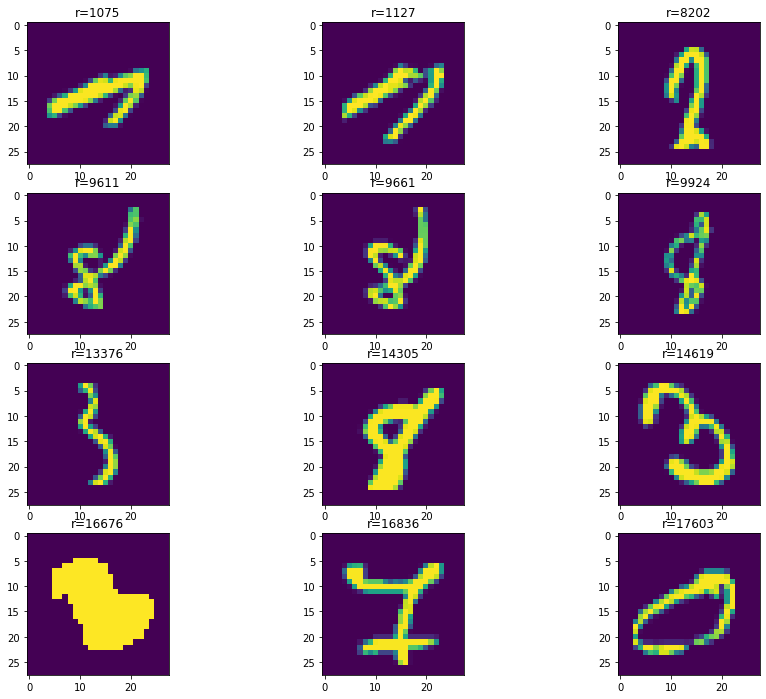

In [9]:
# parameters for mnist, cosine
neighbor_threshold = 0.17
probability_threshold = 0.1
metric='cosine'

# parameters for mnist, euclidean
#neighbor_threshold = 145
#probability_threshold = 0.1
#metric='euclidean'

#distances = mu.calc_pairwise_distances(high_level_features_target, high_level_features_reference, used_data, metric=metric, n_jobs=1)
distances = np.load(used_data.dataset_path + 'high_level_features/pairwise_distances_' + metric + '.npy')

# some possible metrices: 'euclidean', 'cosine'
target_records = mu.select_target_records(neighbor_threshold, probability_threshold, used_data, distances)

print('number of target_records: ', len(target_records))
print('target_records: ', target_records)
if(len(target_records) < 20):
  mu.plot_target_records(target_records, used_data.input_shape, used_data)

## Direct Inference Attack

In [12]:
reference_inferences = mu.get_model_inference(target_records, 
                                           used_data.target_train_images, 
                                           used_data.target_train_labels,
                                           reference_models)
target_inferences = mu.get_model_inference(target_records,
                                           used_data.target_train_images,
                                           used_data.target_train_labels,
                                           target_models)

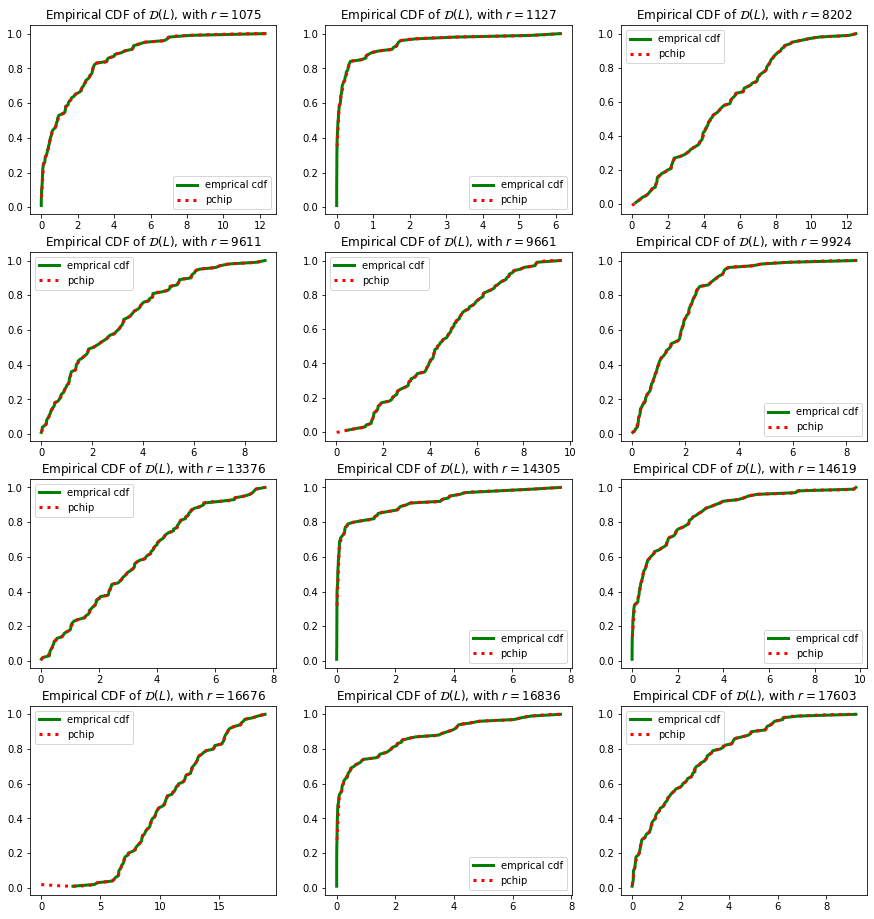

In [13]:
pchip_references = mu.sample_reference_losses(target_records, reference_inferences)

In [14]:
cut_off_p_value = 0.015
path = used_data.dataset_path + 'target_models/records_per_target_model.csv'
records_per_target_model = np.genfromtxt(path, delimiter=',', dtype='i')

p_values = mu.hypothesis_test(used_data, records_per_target_model, 
                              target_records, cut_off_p_value, pchip_references, 
                              target_inferences)

target_record:  1075
fn:  20 tn:  46 fp:  4 tp:  30
precision:  0.8823529411764706
recall:  0.6


target_record:  1127
fn:  49 tn:  50 fp:  0 tp:  1
precision:  1.0
recall:  0.02


target_record:  8202
fn:  0 tn:  50 fp:  0 tp:  50
precision:  1.0
recall:  1.0


target_record:  9611
fn:  2 tn:  25 fp:  25 tp:  48
precision:  0.6575342465753424
recall:  0.96


target_record:  9661
fn:  0 tn:  36 fp:  14 tp:  50
precision:  0.78125
recall:  1.0


target_record:  9924
fn:  1 tn:  35 fp:  15 tp:  49
precision:  0.765625
recall:  0.98


target_record:  13376
fn:  8 tn:  50 fp:  0 tp:  42
precision:  1.0
recall:  0.84


target_record:  14305
fn:  23 tn:  41 fp:  9 tp:  27
precision:  0.75
recall:  0.54


target_record:  14619
fn:  20 tn:  35 fp:  15 tp:  30
precision:  0.6666666666666666
recall:  0.6


target_record:  16676
fn:  50 tn:  40 fp:  10 tp:  0


target_record:  16836
fn:  46 tn:  49 fp:  1 tp:  4
precision:  0.8
recall:  0.08


target_record:  17603
fn:  3 tn:  35 fp:  15 tp:  47
